### a) 

Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importerar datan och läser in den till dataframes.

In [2]:
movies = "../data/ml-latest/movies.csv"
rating = "../data/ml-latest/ratings.csv"

df_movies = pd.read_csv(movies)
df_rating = pd.read_csv(rating)
print(df_rating.head())
print(df_movies.head())

   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3       1      260     4.5  1225735204
4       1      356     5.0  1225735119
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Visar fördelningen av ratings i datasetet.

<Axes: >

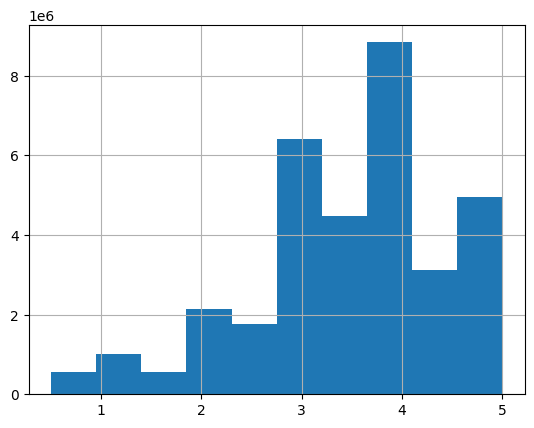

In [3]:
df_rating['rating'].hist() # creates a histogram over the ratings.


- df_movies beskriver 86,537 filmer. Filmerna har id (movieId) och titel(title). (genres) är en lista över genrer. 
- df_rating innehåller 33,832,162 betyg från användare. (userID) är vem som gett betyget. (movieID) är vilken film det gäller. (rating) är betyget på en skala (0.5-5). (timestamp) är när betyget sattes.
- Ser även ett det inte saknas någon data.

In [4]:
print(df_movies.info())
print(df_rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB
None


Nedan kod ger en överblick över datasetens storlek och omfång. 

In [5]:
print(df_rating.describe())
print(df_movies.describe())


             userId       movieId        rating     timestamp
count  3.383216e+07  3.383216e+07  3.383216e+07  3.383216e+07
mean   1.654380e+05  2.831348e+04  3.542540e+00  1.269362e+09
std    9.534122e+04  4.992865e+04  1.063959e+00  2.541023e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    8.295300e+04  1.219000e+03  3.000000e+00  1.046718e+09
50%    1.661290e+05  3.263000e+03  4.000000e+00  1.264740e+09
75%    2.474500e+05  4.049100e+04  4.000000e+00  1.496919e+09
max    3.309750e+05  2.889830e+05  5.000000e+00  1.689843e+09
             movieId
count   86537.000000
mean   155932.817096
std     78037.145347
min         1.000000
25%    111443.000000
50%    164574.000000
75%    211225.000000
max    288983.000000


Mergar df_rating och df_movies på movieId

In [6]:
# Merge df_rating and df_movies on 'movieId'
df_merged = pd.merge(df_rating, df_movies, on='movieId')


In [7]:
df_merged

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,1225734739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,110,4.0,1225865086,Braveheart (1995),Action|Drama|War
2,1,158,4.0,1225733503,Casper (1995),Adventure|Children
3,1,260,4.5,1225735204,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,1,356,5.0,1225735119,Forrest Gump (1994),Comedy|Drama|Romance|War
...,...,...,...,...,...,...
33832157,330975,8340,2.0,1091583256,Escape from Alcatraz (1979),Drama|Thriller
33832158,330975,8493,2.5,1091585709,Memphis Belle (1990),Action|Drama|War
33832159,330975,8622,4.0,1091581777,Fahrenheit 9/11 (2004),Documentary
33832160,330975,8665,3.0,1091581765,"Bourne Supremacy, The (2004)",Action|Crime|Thriller


-------

### b)

b) Vilka är de 10 filmerna med flest ratings?



In [8]:

# count the numbers of ratin for each movie
rating_counts = df_merged.groupby('title').size()

# sort to get the top ten movies with most ratings
ten_top_movies = rating_counts.sort_values(ascending=False).head(10)

# shows the top 10 movies with the most rating
ten_top_movies


title
Shawshank Redemption, The (1994)                         122296
Forrest Gump (1994)                                      113581
Pulp Fiction (1994)                                      108756
Matrix, The (1999)                                       107056
Silence of the Lambs, The (1991)                         101802
Star Wars: Episode IV - A New Hope (1977)                 97202
Fight Club (1999)                                         86207
Schindler's List (1993)                                   84232
Jurassic Park (1993)                                      83026
Star Wars: Episode V - The Empire Strikes Back (1980)     80200
dtype: int64

-----

### c)

c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.


In [9]:
# calc the average rating of the 10 movies with most ratings
average_ratings = df_merged[df_merged['title'].isin(ten_top_movies.index)].groupby('title')['rating'].mean()
# reindex to match index
average_ratings = average_ratings.reindex(ten_top_movies.index)

# combine into a datafram
ten_top_movies_df = pd.DataFrame({
    'rating_count': ten_top_movies,
    'average_rating': average_ratings
})

# sort the dataframe
ten_top_movies_df = ten_top_movies_df.sort_values(by='rating_count', ascending=False)

ten_top_movies_df



,rating_count,average_rating
title,,
"Shawshank Redemption, The (1994)",122296,4.416792
Forrest Gump (1994),113581,4.068189
Pulp Fiction (1994),108756,4.191778
"Matrix, The (1999)",107056,4.160631
"Silence of the Lambs, The (1991)",101802,4.150287
Star Wars: Episode IV - A New Hope (1977),97202,4.092400
Fight Club (1999),86207,4.236019
Schindler's List (1993),84232,4.242337
Jurassic Park (1993),83026,3.689013


------


### d)

d) Gör en plot över årtal och antalet filmer representerade i datasetet


Grafen visar en tydlig ökning över tid med en topp runt 2022. Detta betyder mest sannorligt att det görs mer och mer filmer. 

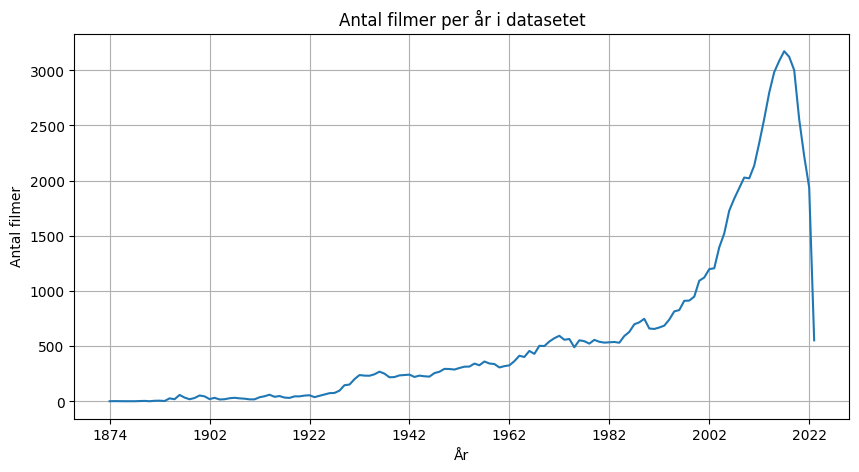

In [10]:
# Extract years from title and create a new column 'year'
df_merged['year'] = df_merged['title'].str.extract(r'\((\d{4})\)')

# calculate number of unique movies/year
movies_per_year = df_merged.drop_duplicates(subset=['title', 'year'])['year'].value_counts().sort_index()


plt.figure(figsize=(10, 5))  
movies_per_year.plot(kind='line')  
plt.title('Antal filmer per år i datasetet')  
plt.xlabel('År')  
plt.ylabel('Antal filmer')  
plt.grid(True)  
plt.show()  




-----

### e)

e) Gör en plot över antalet ratings mot movieId

Grafen visar att vissa filmer har fått betydligt mer ratings än andra. Det finns några filmer (de med de högsta staplarna) som utmärker sig med extremt många betyg. Dessa skulle kunna betraktas som outliers.

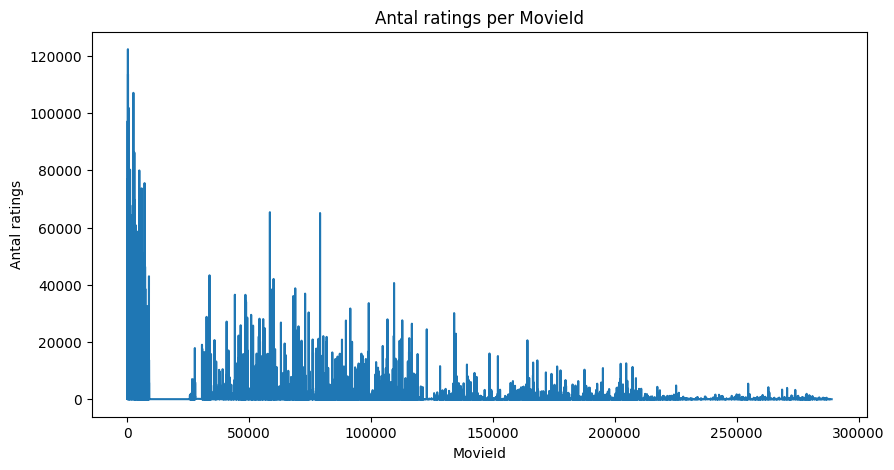

In [11]:
plt.figure(figsize=(10, 5))
df_merged['movieId'].value_counts().sort_index().plot()
plt.title('Antal ratings per MovieId')
plt.xlabel('MovieId')
plt.ylabel('Antal ratings')
plt.show()

------

### f)

f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

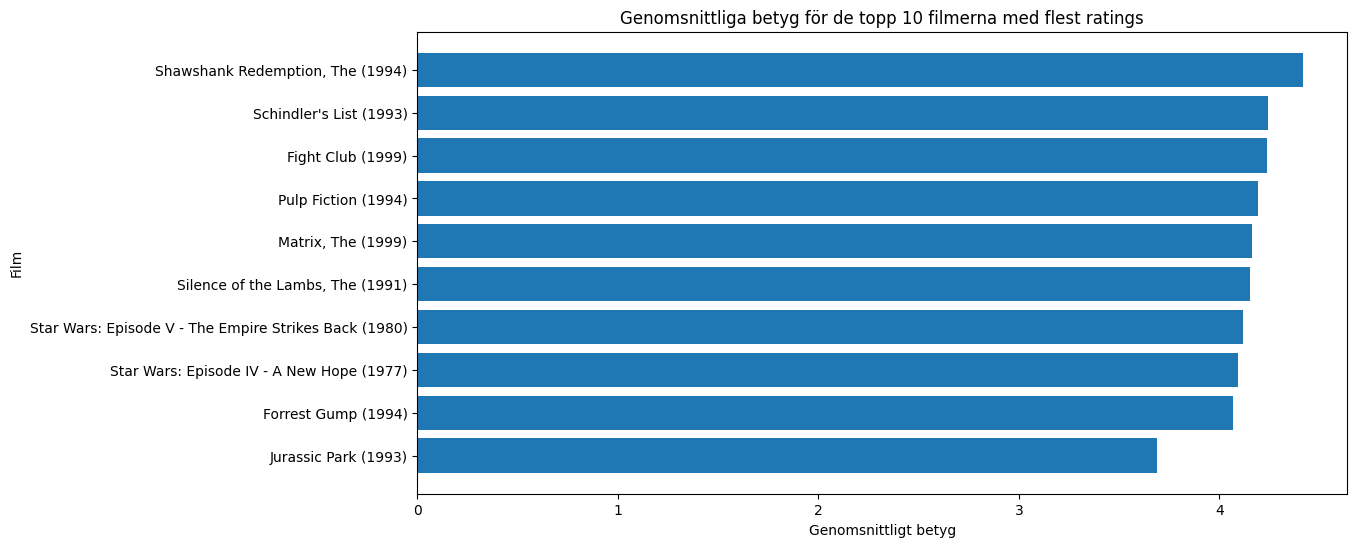

In [12]:
# sort the ten top movies 
ten_top_movies_sorted = ten_top_movies_df.sort_values('average_rating', ascending=False)



plt.figure(figsize=(12, 6))
plt.barh(ten_top_movies_sorted.index, ten_top_movies_sorted['average_rating'])
plt.xlabel('Genomsnittligt betyg')
plt.ylabel('Film')
plt.title('Genomsnittliga betyg för de topp 10 filmerna med flest ratings')
plt.gca().invert_yaxis()  # Invert y-axel 
plt.show()


In [13]:
ten_top_movies_sorted

,rating_count,average_rating
title,,
"Shawshank Redemption, The (1994)",122296,4.416792
Schindler's List (1993),84232,4.242337
Fight Club (1999),86207,4.236019
Pulp Fiction (1994),108756,4.191778
"Matrix, The (1999)",107056,4.160631
"Silence of the Lambs, The (1991)",101802,4.150287
Star Wars: Episode V - The Empire Strikes Back (1980),80200,4.118030
Star Wars: Episode IV - A New Hope (1977),97202,4.092400
Forrest Gump (1994),113581,4.068189


-------

### Andra aspekter av datan

- Första grafen visar antalet filmer per genre.
- Andra grafen visar genomsnittligt betyg per genre.

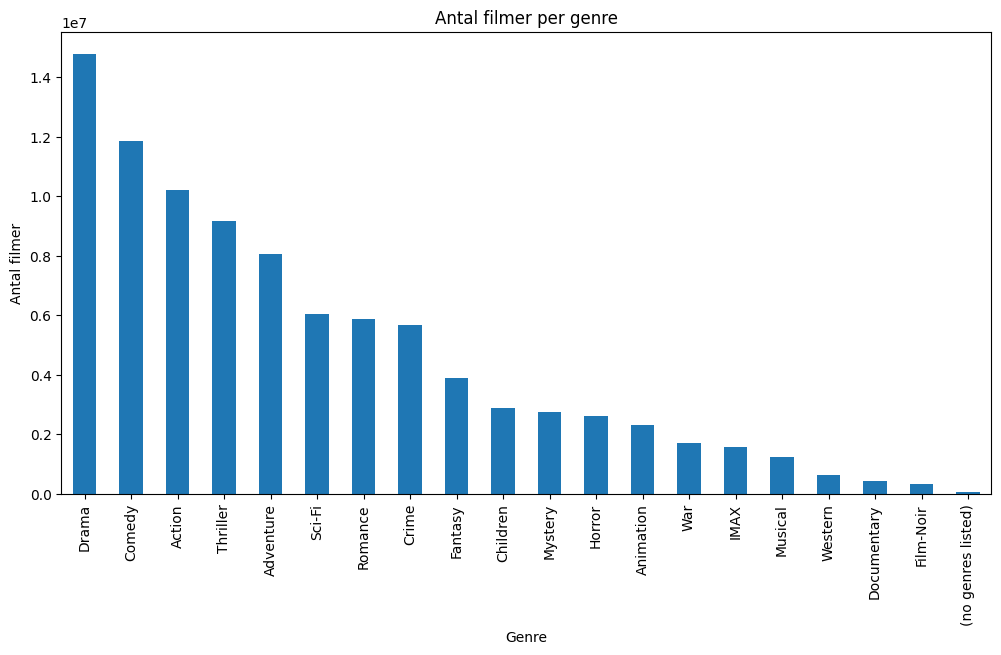

In [14]:
from itertools import chain

# Create a Series where each genre for each movie is a separate element
all_genres = pd.Series(chain.from_iterable(
    movie.split('|') for movie in df_merged['genres']
))

# count the frequency of each genre
genre_counts = all_genres.value_counts()


plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Antal filmer per genre')
plt.xlabel('Genre')
plt.ylabel('Antal filmer')
plt.xticks(rotation=90)
plt.show()


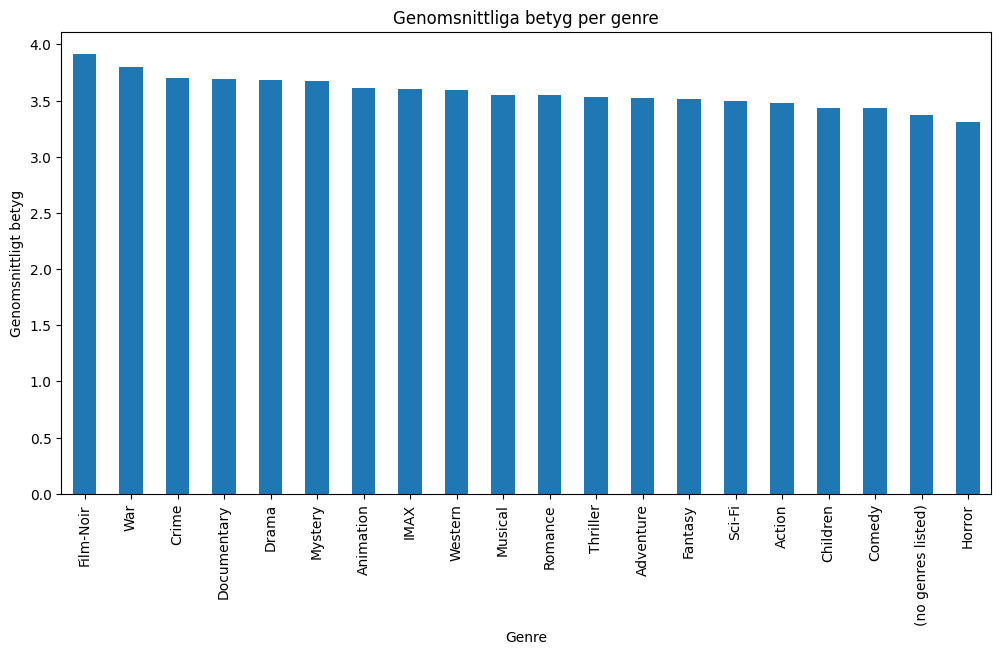

In [15]:
# create a datafram where each row connects a movie to a genre
genres_expanded = df_movies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')

# connect to df_movies to get the movieId
genres_with_movieId = genres_expanded.join(df_movies['movieId'], how='left')

# merge with rating from df_rating
genres_with_ratings = genres_with_movieId.merge(df_rating, on='movieId', how='left')

# calculate the mean rating for each genre
average_rating_per_genre = genres_with_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
average_rating_per_genre.plot(kind='bar')
plt.title('Genomsnittliga betyg per genre')
plt.xlabel('Genre')
plt.ylabel('Genomsnittligt betyg')
plt.xticks(rotation=90)
plt.show()


--------------


1.2 Skapa gles matris
- Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId" och values: "ratings". 
- Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att klara av skapa den om du inte filtrerar bort viss data. 
- Fundera ut ett lämpligt sätt att filtrera ditt dataset, pröva dig fram och motivera.
- Skapa en gles (sparse) matris av denna pivottabell mha scipy.sparse.csc_matrix(). Vill du använda
- dig av all data går det också att lösa, men du behöver lösa hur du skapar den glesa matrisen utan pandas pivot-tabell.


In [16]:
df_merged.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,1225734739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,110,4.0,1225865086,Braveheart (1995),Action|Drama|War,1995
2,1,158,4.0,1225733503,Casper (1995),Adventure|Children,1995
3,1,260,4.5,1225735204,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977
4,1,356,5.0,1225735119,Forrest Gump (1994),Comedy|Drama|Romance|War,1994


# Filtrera datan

För att förbättra kvaliteten och relevansen i systemet så har jag valt två filtreringssteg i datasetet. Dessa steg fokuserar på filmer och användare med tillräckligt många ratings.

Val av Filmer Baseras på Popularitet:
 - Ser till att all filmer har minst 300 ratings. Detta för att det ska finnas tillräckligt stort underlag för att vara pålitligt.

Vikten av Aktiva Användare:
 - inkluderar endast användare som gett minst 100 ratings. Detta för att datan från aktiva användare ger en bättre grubd flr att identifiera återkommande betygsmönster och preferenser.

Fick genom detta ner sample sizen från 33.8 miljoner till 25.2 miljoner som verkar fungera rätt ok och datamängden är fortfarande tillräckligt stor.

In [17]:
# Filter based on at least 300 ratings per movie
min_ratings_per_movie = 300
# Count the number of ratings per movie and compare with the minimum threshold
filter_movies = df_merged['movieId'].value_counts() >= min_ratings_per_movie
# Keep only movie IDs that have at least 300 ratings
filter_movies = filter_movies[filter_movies].index
# Filter the original dataframe to include only selected movies
df_filtered = df_merged[df_merged['movieId'].isin(filter_movies)]

# Filter based on at least 100 ratings from user
min_ratings_per_user = 100
filter_users = df_filtered['userId'].value_counts() >= min_ratings_per_user
filter_users = filter_users[filter_users].index
df_filtered = df_filtered[df_filtered['userId'].isin(filter_users)]
df_filtered

,userId,movieId,rating,timestamp,title,genres,year
304,7,1,4.0,974518024,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
305,7,3,3.0,974517393,Grumpier Old Men (1995),Comedy|Romance,1995
306,7,11,5.0,974520467,"American President, The (1995)",Comedy|Drama|Romance,1995
307,7,21,2.0,974518824,Get Shorty (1995),Comedy|Crime|Thriller,1995
308,7,25,3.0,974519270,Leaving Las Vegas (1995),Drama|Romance,1995
...,...,...,...,...,...,...,...
33832157,330975,8340,2.0,1091583256,Escape from Alcatraz (1979),Drama|Thriller,1979
33832158,330975,8493,2.5,1091585709,Memphis Belle (1990),Action|Drama|War,1990
33832159,330975,8622,4.0,1091581777,Fahrenheit 9/11 (2004),Documentary,2004
33832160,330975,8665,3.0,1091581765,"Bourne Supremacy, The (2004)",Action|Crime|Thriller,2004


### Pivottabell

Synkroniserar df_titles med df_filtered detta säkerhetsställer att titlarna matchar med de relevanta film-Id:n i den filtrerade datan. 
Sedan skapas en pivottabell som använder dessa Film-id:s som index vilket gör att index i df_titles och pivottabellen stämmer överrens. 

In [18]:
# Create a DataFrame with unique movie IDs and titles, and set 'movieId' as the index.
df_titles = df_filtered[['movieId', 'title']].drop_duplicates().set_index('movieId')


In [19]:
# Create a pivot table with movie IDs as rows, user IDs as columns, and ratings as values, filling missing values with 0.
pivot_table = df_filtered.pivot(index='movieId', columns='userId', values='rating').fillna(0)

Koden nedan kontollera om det finns några id:n som inte matchar mellan pivot_table och df_titles. Vilket det inte gör då listorna är tomma.

In [20]:
# Check if all IDs in pivot_table are also in df_titles
missing_in_titles = [id for id in pivot_table.index if id not in df_titles.index]
print("Missing in df_titles:", missing_in_titles)

# Check if all IDs in df_titles are also in pivot_table
missing_in_pivot = [id for id in df_titles.index if id not in pivot_table.index]
print("Missing in pivot_table:", missing_in_pivot)

Missing in df_titles: []
Missing in pivot_table: []


In [21]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7876 entries, 1 to 286897
Columns: 80963 entries, 7 to 330975
dtypes: float64(80963)
memory usage: 4.8 GB


### Skapa gles matris

Genom nedan kod omvandlas datasetet pivot_table till en gles matris. 
 - Ratings är de värden som ska fylla matrisen. Vilka är de betyg som användarna har gett till olika filmer. 
 - Varje rad i matrisen representerar en unik film.
 - Varje kolumn i matrisen representerar en unik användare.


In [22]:
pivot_table.head()

userId,7,9,10,14,21,22,24,30,31,33,...,330941,330942,330947,330948,330949,330961,330967,330972,330974,330975
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,3.0,2.5,3.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,0.0,3.0,0.0,2.5
2,0.0,4.0,0.0,2.5,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,3.0,2.0
3,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0


In [23]:
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(pivot_table)


In [24]:
sparse_matrix

<7876x80963 sparse matrix of type '<class 'numpy.float64'>'
	with 25187665 stored elements in Compressed Sparse Row format>

-----


### 1.3 Recommender system
Skapa ett recommender system med KNN och låt systemet ta input från användaren och skriva ut top 5
rekommenderade filmerna, baserat på användarens sökquery. Observera att det finns ett logiskt fel i
videon som gör att rekommendationerna inte blir så bra, försök hitta felet och åtgärda det.
 - a) Beskriv med ord hur ditt system fungerar.
 - b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte
källhänvisa.


I koden nedan skapas en instans av 'NearestNeighbors' med specifika parametrar. 
- metric använder cosinuslikhet som avståndsmått för att bedöma likheten mellan datapunkter.
- algorithm använder en "brute force" sök-algortihm. Vilket betyder att den beräknar avståndet mellan varje par av punkter för att hitta de närmaste grannarna.
- n_neighbors=20 söker efter de 20 närmaste grannarna för varje datapunkt.

modellen tränas på den glesa matrisen (sparse_matrix)

In [25]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

# Initialize the NearestNeighbors model with cosine similarity, brute force algorithm, and 20 neighbors
model_knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20)

# Fit the model on the sparse matrix 
model_knn.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

## 1.3 a) Beskriv med ord hur ditt system fungerar.

1. Det börjar med att systemet tar emot ett filmnamn som input från användare.

2. Fuzzy matching används för att hantera stavfel och otydligheter i inputen. 'process.extractOne söker igenom en lista med filnamn (df_titles) och hittar det närmaste matchande namnet. 

3. Funktionen kontrollerar sedan om det film-ID som matchat finns i 'pivot_tabe', vilken är den datamatris där filmerna är indexerade. Om filmen finns så fortsätter programmet. Om inte så får man ett meddelande om det.

4. Då man hittar en matchning så hämtar systemet indexet för filmen från 'pivot_table' och använder det indexet för att söka efter liknande filmer med hjälp av 'model.kneighbors'

5. Systemet använder KNN för att identifiera de fem närmaste grannarna till den valda filmen, men eftersom den begärda filmen alltid inkluderas ökas antalet grannar med ett för att kompensera. Därefter används indices.flatten()[1:] för att:
    -  Eftersom den ursprungliga 2D-arrayen från KNN-modellen kan vara svårare att hantera med flera dimensioner, omvandlas den till en enklare 1D-array.
    - Ta bort den första positionen, som är den begärda filmen, och behålla endast de övriga    filmerna som verkliga rekommendationer. 

6. Sedan hämtar funktionen för varje rekommenderad film indexet från 'df_titles' och skriver ut titlarna. 

In [26]:
def recommender(movie_name, df_titles, pivot_table, model, n_recommendations=5):
    # Use fuzzy matching to find the closest possible match for the user's input movie name.
    # This helps handle cases where the input might be slightly misspelled or incomplete.
    best_match = process.extractOne(movie_name, df_titles['title'])
    best_movie_id = best_match[2]  
    
    # Check if the matched movie ID is in the index of the pivot table.
    if best_movie_id in pivot_table.index:
        # Get the position of this movie in the matrix based on its ID.
        movie_idx = pivot_table.index.get_loc(best_movie_id)
        # Use the model to find movies with similar user ratings.
        # Retrieve the distances and indices of these similar movies.
        distances, indices = model.kneighbors(sparse_matrix[movie_idx], n_neighbors=n_recommendations + 1)
        
        print(f"Recommendations for '{best_match[0]}' (based on ratings):")
        # Convert the indices from a 2D array to a 1D array, skipping the first index.
        # The first index is excluded because it refers to the movie itself.
        recommended_indices = indices.flatten()[1:]  
        
        # Loop through each recommended movie index to display their titles.
        for i in recommended_indices:
            recommended_movie_id = pivot_table.index[i]
            print(df_titles.loc[recommended_movie_id, 'title'])
    else:
        print("The movie is not found in the database. Please try another movie name.")


user_input = input("Enter a movie name to get recommendations: ")
# Call the recommender function with the user input. 
recommender(user_input, df_titles, pivot_table, model_knn)

Recommendations for 'Star Wars: Episode IV - A New Hope (1977)' (based on ratings):
Star Wars: Episode V - The Empire Strikes Back (1980)
Star Wars: Episode VI - Return of the Jedi (1983)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Matrix, The (1999)
Back to the Future (1985)


### b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. 


Med hjälp av rekommendationssystem kan man förutsäga och föreslå produkter, tjänster eller innehåll som användare sannolikt kommer att uppskatta, baserat på deras tidigare beteenden och preferenser. Det finns huvudsakligen tre typer av rekommendationssystem:

1. Kollaborativ filtrering:
    - Rekommenderar produkter baserat på tidigare köp eller gillanden av användare
    - Identifierar och rekommenderar produkter baserat på likheter mellan användarens intressen.
2. Innehållsbaserad filtrering:
    - Systemet föreslår produkter baserade på deras egenskaper som till exempel genre eller kategori. Kräver dock tillräckligt med data för att vara träffsäker.
3. Hybridfiltrering:
    - kombinerar kollaborativ och innehållsbaserad filtrering för att förbättra nogrannheten och överkomma svårigheter med datamängd.

Livscykeln för dessa system inkluderar insamling och lagring av data, datarening, analys genom maskininlärning, utvärdering av modellen, och implementering med kontinuerliga uppdateringar och förbättringar baserade på ny data.

källa: https://medium.com/@khang.pham.exxact/what-are-recommendation-systems-6bb5036042db

### Sammanfattning

Väldigt klurigt men lärorik labb. Det har blivit många timmar med tester och funderingar på hur man ska lösa problemet. Jag fastnade väldigt länge på det logiska problemet. 
Tillsammans med det och en hel del Vab och sjukdom så valde jag att inte göra bonusuppgiften utan ville helldre att den obligatoriska skulle bli så bra som möjligt.
Jag tror att jag löste alla problem jag stötte på tillsammans med dig Kokchun. Ser fram emot att få lära mig mer om AI och alla olika sorters modeller.

